Import libraries and the data. Normalize and transpose

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [3]:
#features = pd.read_csv("../Downloads/labeled_features.csv", header = -1)
#features.rename(columns={112 : 'label'}, inplace=True)
#features['label'] = features['label'] > 0
#features.to_csv("new_labeled_features.csv")
features = pd.read_csv("../data/new_labeled_features.csv",index_col=0)
tfeatures = features.T
normalizer = preprocessing.Normalizer().fit(tfeatures)
nfeatures = normalizer.transform(tfeatures)

In [ ]:
tfeatures.shape





First 28 attributes (first signal) grouped by four

In [ ]:
for i in range(7):
    fig, ax = plt.subplots(4)
    k = 4*i
    ax[0].plot(tfeatures.iloc[k].values)
    ax[1].plot(tfeatures.iloc[k+1].values)
    ax[2].plot(tfeatures.iloc[k+2].values)
    ax[3].plot(tfeatures.iloc[k+3].values)

In [ ]:
for i in range(7):
    fig, ax = plt.subplots(4)
    k = 4*i
    ax[0].plot(nfeatures[k])
    ax[1].plot(nfeatures[k+1])
    ax[2].plot(nfeatures[k+2])
    ax[3].plot(nfeatures[k+3])





Feature selection using a method and feature importance from fitting a model. Dimensiolality reduction using PCA

In [ ]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the iris datasets
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
#feaes.rename(columns={112 : 'label'}, inplace=True)
rfe = rfe.fit(features.iloc[:, :28], features["label"])
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
dataset = datasets.load_iris()
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(features.iloc[:, :28], features["label"])
# display the relative importance of each attribute
print(model.feature_importances_)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(features.iloc[:, :28])
plt.scatter(projected[:, 0], projected[:, 1],
            c=features['label'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Blues', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();






Plots in general

In [ ]:
fig = plt.figure(figsize = (30,15))
plt.plot(tfeatures.iloc[0].values,'-ok')
fig = plt.figure(figsize = (30,15))
plt.scatter(tfeatures.columns, tfeatures.iloc[0].values, c=features.label, cmap='viridis')
plt.colorbar();
fig.savefig("figures/scatter.png")

In [ ]:
for i in range(4):
    fig = plt.figure(figsize = (100,30))
    plt.plot(tfeatures.iloc[28*i].values)
    a = np.zeros((4146,1)) + np.array([tfeatures.iloc[28*i].mean()])
    plt.plot(features.index, a)
    fig.savefig('./figures/attribute' + str(28*i) + '.png')

In [ ]:
fig = plt.figure(figsize = (100,30))
plt.plot(tfeatures.iloc[0].values, label=str(1))
plt.plot(tfeatures.iloc[28].values, label=str(2))
plt.plot(tfeatures.iloc[56].values, label=str(3))
plt.plot(tfeatures.iloc[84].values, label=str(4))
plt.legend()
    #a = np.zeros((4146,1)) + np.array([tfeatures.iloc[28*i].mean()])
    #plt.plot(features.index, a)
fig.savefig('./figures/attributes.png')

In [ ]:
fig = plt.figure(figsize = (100,30))
plt.plot(nfeatures[0], label=str(1))
plt.plot(nfeatures[28], label=str(2))
plt.plot(nfeatures[56], label=str(3))
plt.plot(nfeatures[84], label=str(4))
plt.legend()
    #a = np.zeros((4146,1)) + np.array([tfeatures.iloc[28*i].mean()])
    #plt.plot(features.index, a)
fig.savefig('./figures/attributes.png')






Scatter Matrices

/home/vasilis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/vasilis/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/vasilis/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/vasilis/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwa

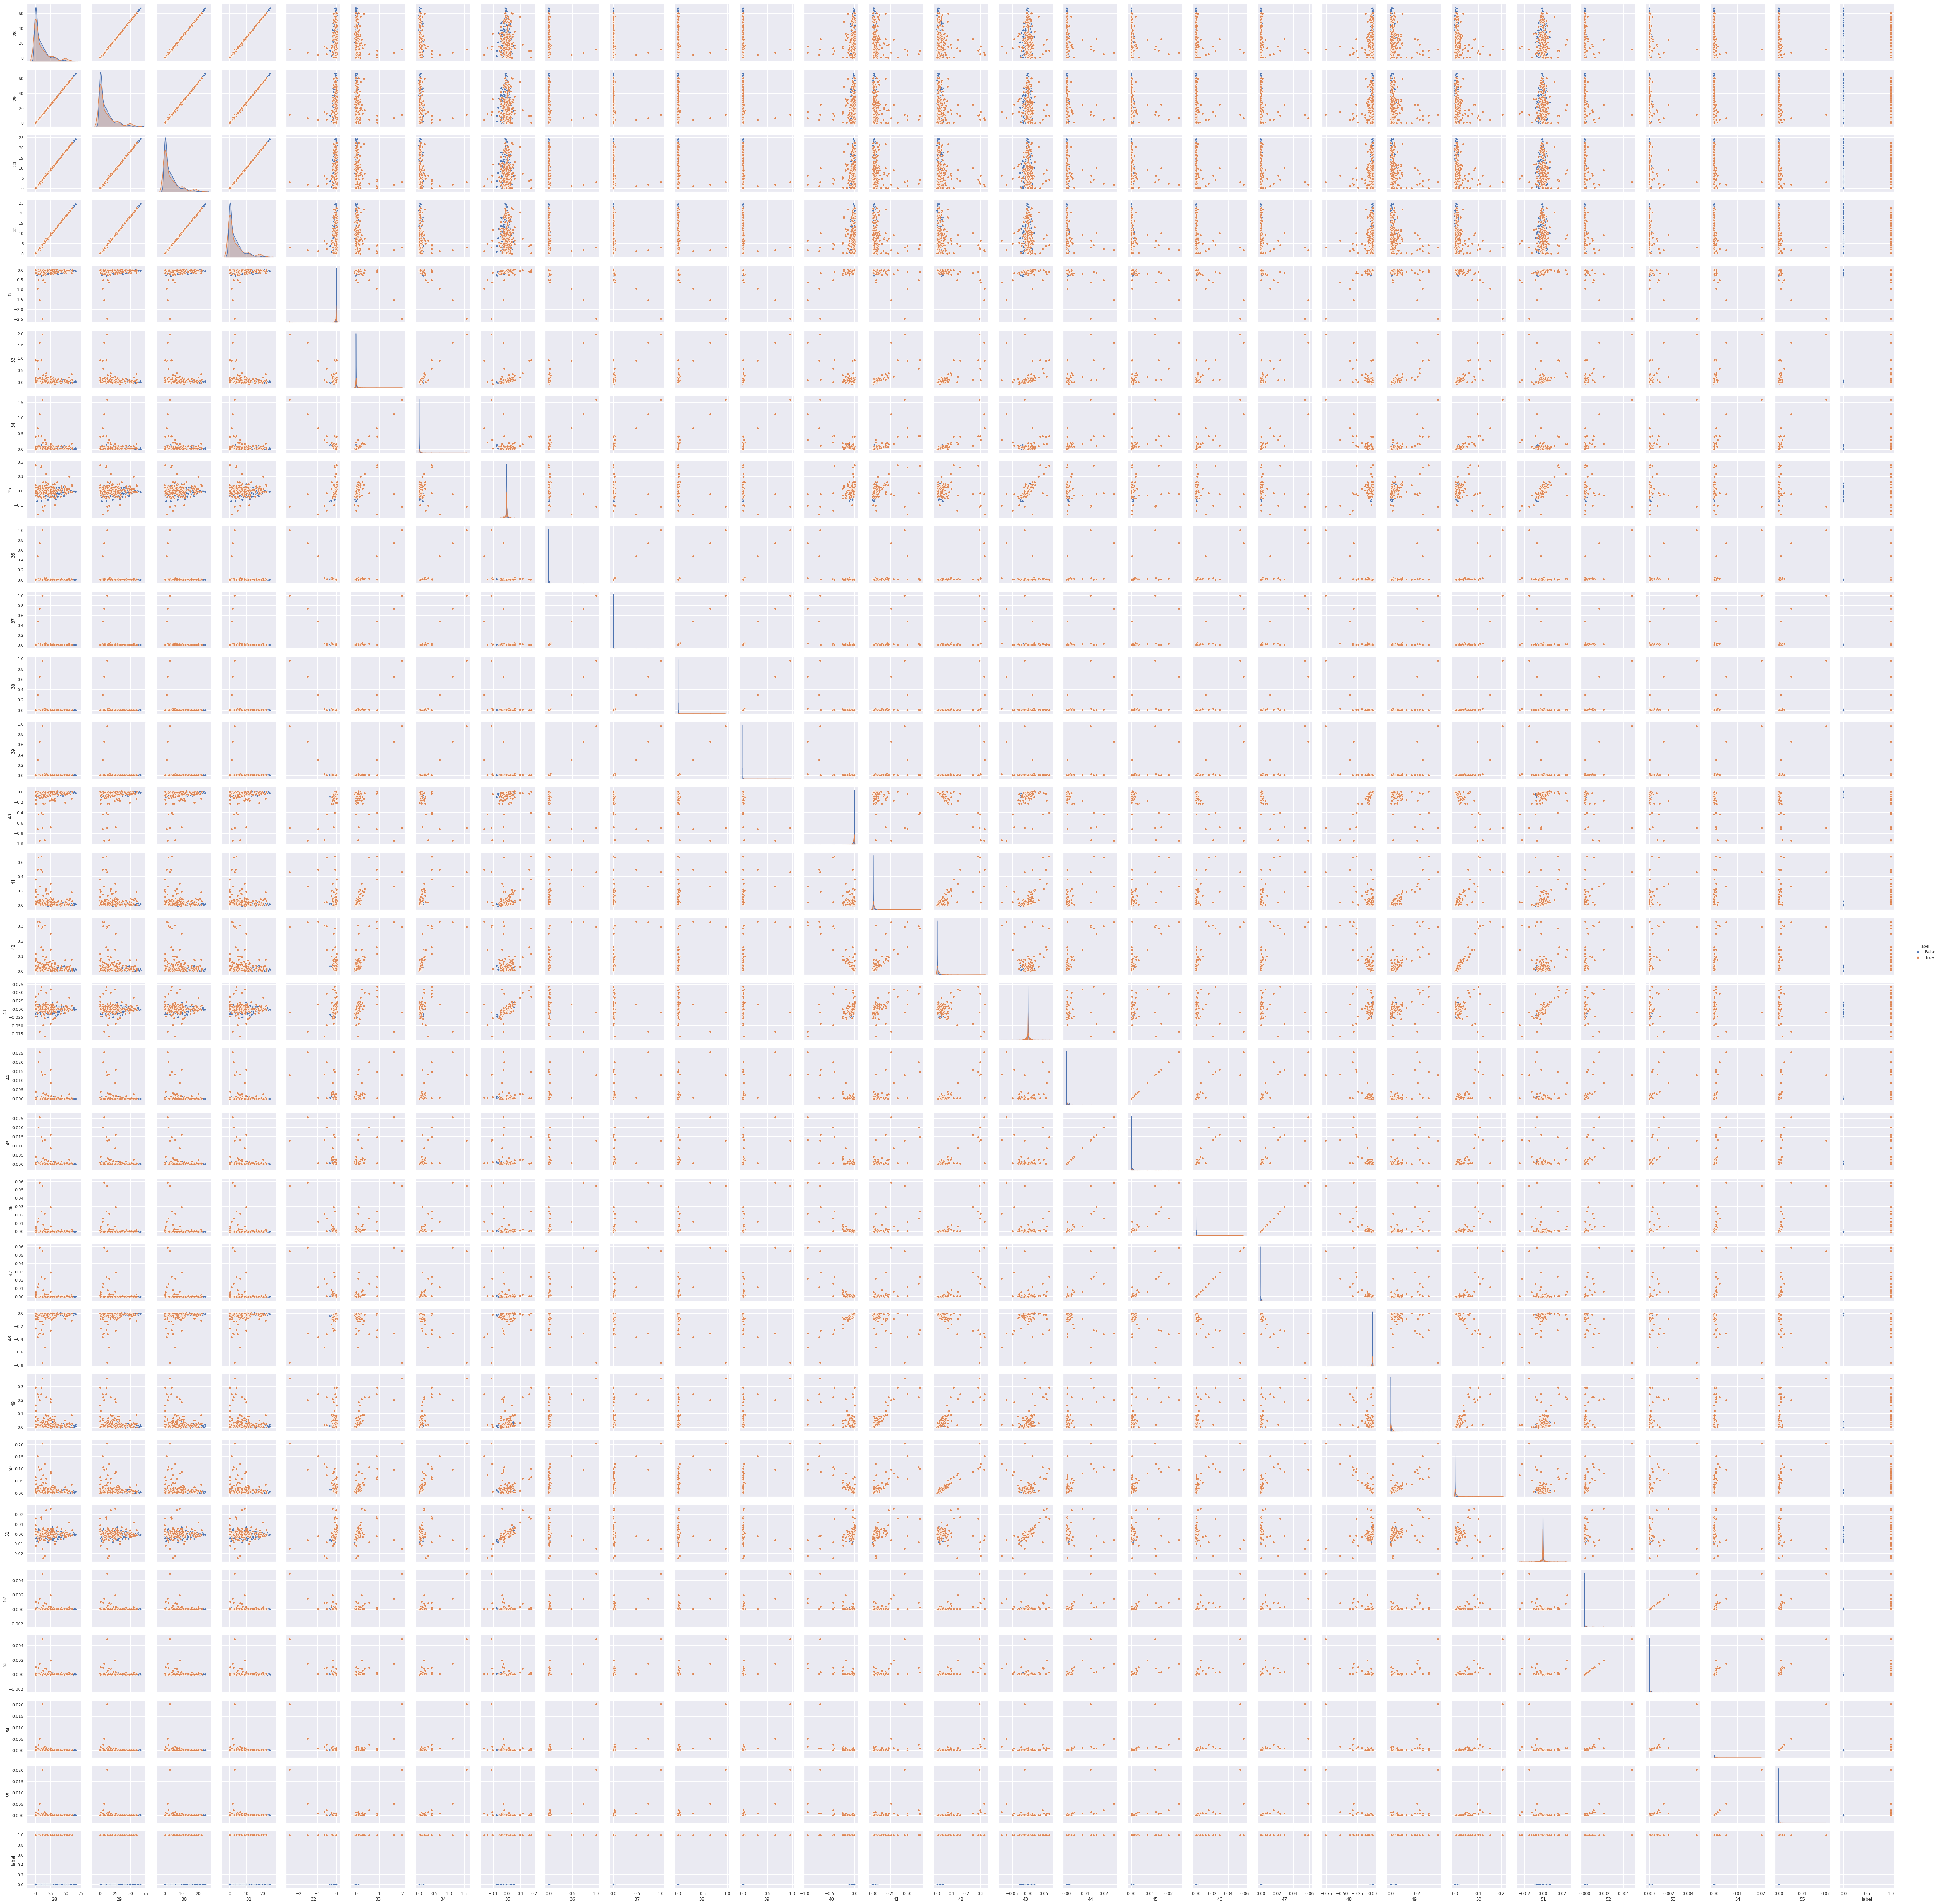

In [5]:
featureLabels = features['label']
featuresPart = pd.concat([features.iloc[:, 28:56], featureLabels], axis=1)
sns.pairplot(featuresPart, hue='label', height=2.5);

In [ ]:
featureLabels = features['label']
featuresPart = pd.concat([features.iloc[:, :4], featureLabels], axis=1)
sns.pairplot(featuresPart, hue='label', height=2.5);

In [ ]:
feat = features.copy()

featLabels = feat['label']
featPart = pd.concat([feat.iloc[:, :28], featLabels], axis=1)
sns.pairplot(featPart, hue='label', height=2.5);